## Understanding Hilbert transform

5000 5.0


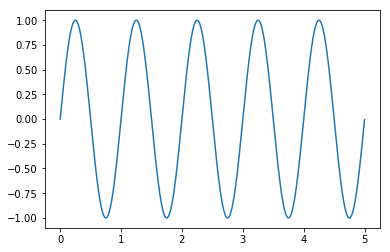

In [124]:
# signal=(np.sin(2*np.pi*tn))
#ph_offset = np.pi/2
ph_offset = 0.2
fs = 1000
endp = 100
k = int(0.05 * fs*endp)
a = np.linspace(0,endp,fs*endp)
signal=(np.sin(2*np.pi*a[:k]))
signal2=(np.sin(2*np.pi*a[:k]+ph_offset))
plt.plot(a[:k],signal)
print(k, k/fs)

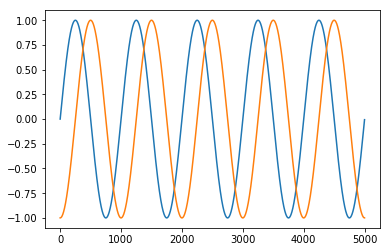

In [115]:
analytic_signal = hilbert(signal)
analytic_signal2 = hilbert(signal2)
amplitude_envelope = np.abs(analytic_signal)
amplitude_envelope2 = np.abs(analytic_signal2)
instantaneous_phase = (np.angle(analytic_signal))
instantaneous_phase2 = (np.angle(analytic_signal2))
plt.plot(analytic_signal.real)
plt.plot(analytic_signal.imag)

-0.314081974735


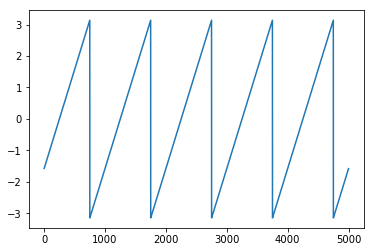

In [164]:
plt.plot(instantaneous_phase)
print(instantaneous_phase[1200])

In [117]:
np.where(np.abs(instantaneous_phase)<0.05)[0]

array([ 243,  244,  245,  246,  247,  248,  249,  250,  251,  252,  253,
        254,  255,  256,  257, 1243, 1244, 1245, 1246, 1247, 1248, 1249,
       1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 2243, 2244, 2245,
       2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256,
       2257, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252,
       3253, 3254, 3255, 3256, 3257, 4242, 4243, 4244, 4245, 4246, 4247,
       4248, 4249, 4250, 4251, 4252, 4253, 4254, 4255, 4256, 4257], dtype=int64)

In [118]:
instantaneous_phase[15]

-1.4765301328113585

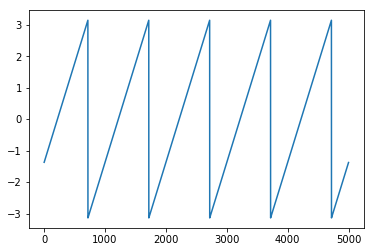

In [119]:
plt.plot(instantaneous_phase2)

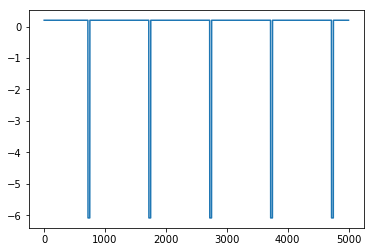

In [120]:
plt.plot((instantaneous_phase2-instantaneous_phase))

## See Fourier transform

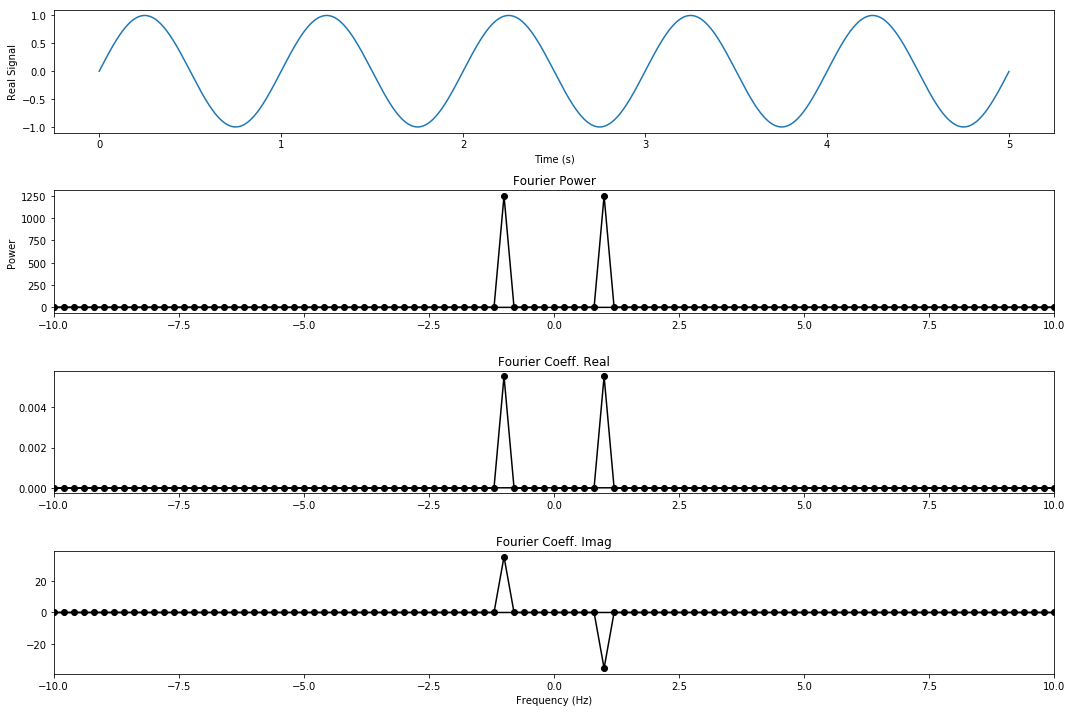

In [151]:
F = np.fft.fft(signal, norm='ortho')
f_axis = np.fft.fftfreq(len(signal),1/fs)

plt.figure(figsize=(15,10))
# time domain plot
plt.subplot(4,1,1)
plt.plot(a[:k],signal)
plt.xlabel('Time (s)')
plt.ylabel('Real Signal')


# frequency domain plots
plt.subplot(4,1,2)
plt.plot(f_axis, np.abs(F)**2,'ko-')
plt.ylabel('Power')
plt.title('Fourier Power')
plt.xlim([-10,10])

plt.subplot(4,1,3)
plt.plot(f_axis, F.real, 'ko-')
plt.title('Fourier Coeff. Real')
plt.xlim([-10,10])

plt.subplot(4,1,4)
plt.plot(f_axis, F.imag, 'ko-', label='Fourier Imag')
plt.title('Fourier Coeff. Imag')
plt.xlim([-10,10])
plt.xlabel('Frequency (Hz)')
plt.tight_layout()


In [152]:
F.real-np.amax(F.real)

array([-0.00555358, -0.00555357, -0.00555355, ..., -0.00555351,
       -0.00555355, -0.00555357])

In [153]:
np.where(np.abs(F.real-np.amax(F.real))<0.0001)[0]

array([   5, 4995], dtype=int64)

In [154]:
np.where(F.real==np.amax(F.real))[0]

array([4995], dtype=int64)

In [155]:
print(f_axis[np.where(F.real==np.amax(F.real))[0]])

[-1.]


In [156]:
print(f_axis[5], F.real[5])

1.0 0.00555146546791


In [157]:
print(f_axis)

[ 0.   0.2  0.4 ..., -0.6 -0.4 -0.2]


In [158]:
print(F.real)

[ -2.11039083e-06  -2.10576288e-06  -2.08923454e-06 ...,  -2.04791412e-06
  -2.08923454e-06  -2.10576288e-06]


## Quiver plot

0.951079813157 -0.308943295863
0.999998771054
-0.314081974735
-0.314081974735
-17.9955715735


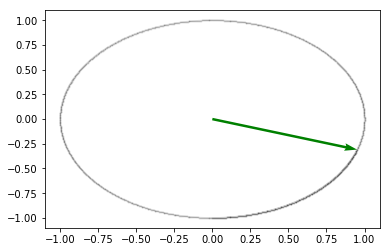

In [181]:
point = 1200
plt.plot(analytic_signal.real[:point],analytic_signal.imag[:point], 'k.-', alpha=0.1, ms=2)
plt.quiver(0,0,analytic_signal[point].real,analytic_signal[point].imag, angles='xy', scale_units='xy', scale=1, color='g')
print(analytic_signal[point].real, analytic_signal[point].imag)
print(analytic_signal[point].real**2 + analytic_signal[point].imag**2)
print(np.arctan2(analytic_signal[point].imag,analytic_signal[point].real))
print(instantaneous_phase[point])
print(instantaneous_phase[point]*180/np.pi)

0.99349949072 -0.113832569732
0.999999091992
-0.114079904028
-0.114079904028
-6.53629702809


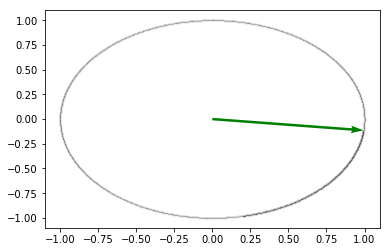

In [182]:
point = 1200
plt.plot(analytic_signal2.real[:point],analytic_signal2.imag[:point], 'k.-', alpha=0.1, ms=2)
plt.quiver(0,0,analytic_signal2[point].real,analytic_signal2[point].imag, angles='xy', scale_units='xy', scale=1, color='g')
print(analytic_signal2[point].real, analytic_signal2[point].imag)
print(analytic_signal2[point].real**2 + analytic_signal2[point].imag**2)
print(np.arctan2(analytic_signal2[point].imag,analytic_signal2[point].real))
print(instantaneous_phase2[point])
print(instantaneous_phase2[point]*180/np.pi)

In [183]:
ph_offset*180/np.pi

11.459155902616464